11490434/11490434 [==============================] - 14s 1us/step
Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2570 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1136 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0781 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 3s 3ms/step - loss: 0.0747 - accuracy: 0.9770
Test accuracy: 0.9770
313/313 [==============================] - 2s 2ms/step


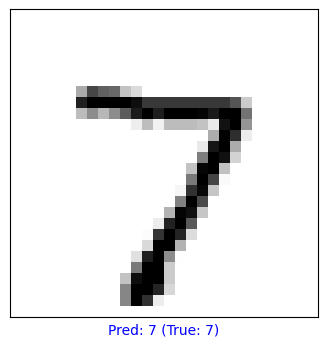

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict on a sample image
predictions = model.predict(x_test)
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label} (True: {true_label})", color=color)

# Plot an example
plt.figure(figsize=(4, 4))
plot_image(0, predictions[0], y_test[0], x_test[0])
plt.show()
